# DAT560: Generative AI

* Lectures: Vinay Setty, Petra Galuscakova.
* Teaching Assistant: Gabriel Iturra-Bocaz.

## Colab
Google Colab is a research tool for teaching and research in Machine Learning. It is a **Jupyter notebook** environment that does not require configuration for its use. Colab offers a free **cloud GPU** service hosted by Google to encourage collaboration in the field of Machine Learning, without worrying about hardware requirements. Colab was released to the public by Google in October 2017.

## GPU
In Colab, you will get **12 hours of runtime**, but the session will disconnect if it is inactive for more than 60 minutes. This means that every 12 hours, the disk, RAM, CPU cache memory and the data located on our assigned virtual machine will be **wiped**.

To enable the use of the GPU hardware accelerator, you only need to go to **Runtime -> Change runtime type -> Hardware accelerator -> GPU**

In [ ]:
!nvidia-smi

Fri Jan  9 09:31:19 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   40C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
!nvidia-smi --query-gpu=memory.total,memory.used,memory.free --format=csv

memory.total [MiB], memory.used [MiB], memory.free [MiB]
15360 MiB, 0 MiB, 15095 MiB


## RAM

In [ ]:
!free -h

               total        used        free      shared  buff/cache   available
Mem:            12Gi       721Mi       8.5Gi       3.0Mi       3.5Gi        11Gi
Swap:             0B          0B          0B


## Storage

In [ ]:
!df -h --total | grep Filesystem
!df -h --total | grep total

Filesystem      Size  Used Avail Use% Mounted on
total           220G   81G  139G  37% -


## Install PyTorch

In [ ]:
# Currently installed PyTorch version: 2.9.0+cu126
# You can verify this by running `torch.__version__` in a code cell.

# Installing Pytorch version 2.3.1 with CUDA 12.1
#!pip install torch==2.3.1 torchvision==0.18.1 torchaudio==2.3.1 --index-url https://download.pytorch.org/whl/cu121

# Installing Pytorch version 2.3.1 without CUDA (CPU only)
#!pip install torch==2.3.1 torchvision==0.18.1 torchaudio==2.3.1 --index-url https://download.pytorch.org/whl/cpu

# Pytorch
It provides two fundamental characteristics:
1. n-dimensional Tensor, similar to Numpy but they can be stored on GPUs
2. automatic differentiation for training Neural Networks

## Installation
Pytorch is installed on the Colab virtual machine. But if you want to run this notebook in another environment, you may need to install it. At https://pytorch.org/ you can find a complete guide.

## Importing PyTorch and other packages
First, we will import the required libraries. Remember that torch, numpy and matplotlib are pre-installed on the Colab virtual machine.

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
torch.__version__

'2.9.0+cu126'

## Tensor
Operations based on Numpy are not optimized to use the GPU and accelerate their numerical calculations. For modern deep neural networks, GPUs often provide speedups of 50x or more. So, unfortunately, numpy will not be sufficient for modern deep learning. This is where Pytorch introduces the concept of Tensor. A Pytorch tensor is conceptually identical to an n-dimensional numpy array. The difference is that PyTorch tensors can use the GPU to accelerate their numerical calculations.

In PyTorch the default tensor type is **float** defined as **torch.FloatTensor**. We can create tensors using the **built-in functions** within the package.

In [ ]:
## creating a tensor of 3 rows and 2 columns consisting of ones
a = torch.ones(3,2)

## creating a tensor of 3 rows and 2 columns consisting of zeros
b = torch.zeros(3,2)

print('a=\n{}'.format(a))
print('b=\n{}'.format(b))

a=
tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])
b=
tensor([[0., 0.],
        [0., 0.],
        [0., 0.]])


We can create tensors **from Python lists or sequences** using the `torch.tensor()` constructor

In [ ]:
a = torch.tensor([[1., -1.], [-1., 1.]])
b = torch.tensor(np.array([[1, 2, 3], [4, 5, 6]]))

print('a=\n{}'.format(a))
print('b=\n{}'.format(b))

a=
tensor([[ 1., -1.],
        [-1.,  1.]])
b=
tensor([[1, 2, 3],
        [4, 5, 6]])


Random **initialization**

In [ ]:
#to increase the reproducibility, we often set the random seed to a specific value first.
torch.manual_seed(2)

#generating tensor randomly from uniform distribution on the interval [0, 1)
a = torch.rand(3, 2)

#generating tensor randomly from standar normal distribution (mean 0 and variance 1)
b = torch.randn(3, 3)

print('a=\n{}'.format(a))
print('b=\n{}'.format(b))

a=
tensor([[0.6147, 0.3810],
        [0.6371, 0.4745],
        [0.7136, 0.6190]])
b=
tensor([[-2.1409, -0.5534, -0.5000],
        [-0.0815, -0.1633,  1.5277],
        [-0.4023,  0.0972, -0.5682]])


## PyTorch <--> numpy
Converting a PyTorch tensor to a numpy `ndarray` can be convenient sometimes. By using `.numpy()` on a tensor we can easily convert the tensor to an `ndarray`.

In [ ]:
x = torch.linspace(0, 1, steps = 5)  # creating a tensor using linspace
print(x)
x_np = x.numpy()  # convert tensor to numpy
print(type(x), type(x_np))  # check the types

tensor([0.0000, 0.2500, 0.5000, 0.7500, 1.0000])
<class 'torch.Tensor'> <class 'numpy.ndarray'>


To convert from an `ndarray` to a `tensor`, we can use `.from_numpy()`

In [ ]:
x = np.random.randn(5)  # generate a random numpy array
print(x)
x_pt = torch.from_numpy(x)  # convert numpy array to a tensor
print(type(x), type(x_pt))

[ 0.07207252  1.21023881  0.08487561 -0.08669264 -2.91734876]
<class 'numpy.ndarray'> <class 'torch.Tensor'>


An important point to note is that PyTorch tensors don't share their memory with the objects that were used to create them. This is illustrated below:

In [ ]:
x = np.arange(5)

# Transform to a PyTorch tensor
x_tensor = torch.tensor(x)

# Print the original numpy array
print(x)

# Change a value from the original array
x[0] = 10

# Print the original value and the Pytorch tensor
print(x)
print(x_tensor)

[0 1 2 3 4]
[10  1  2  3  4]
tensor([0, 1, 2, 3, 4])


On the other hand, the `torch.tensor()` method presented earlier copies the data. Therefore it does not have this behavior. From the method documentation:

*torch.tensor() always copies data.*

## CUDA
To check how many CUDA-compatible GPUs are connected to the machine, you can use the code snippet below. If you are running the code in Colab you will get `1`, which means that the Colab virtual machine is connected to a GPU. `torch.cuda` is used to set up and perform CUDA operations.

In [ ]:
if torch.cuda.is_available():
  print(torch.cuda.device_count())
  print(torch.cuda.get_device_name(0))  # name of the first GPU Card connected to the machine

1
Tesla T4


The important thing to keep in mind is that we can reference this CUDA-compatible GPU card from a variable and use it for any PyTorch operation. All CUDA tensors you allocate will be created on that device. The selected GPU device can be changed using a context manager `torch.cuda.device`.

In [ ]:
# Assign cuda GPU located at location '0' to a variable
cuda0 = torch.device('cuda:0')

# Performing the addition on GPU
a = torch.ones(3, 2, device=cuda0)  # creating a tensor 'a' on GPU 0
b = torch.ones(3, 2, device=cuda0)  # creating a tensor 'b' on GPU 0
# b = torch.ones(3, 2)  # creating a tensor 'b' on GPU 0
c = a + b + 5
print(c)

tensor([[7., 7.],
        [7., 7.],
        [7., 7.]], device='cuda:0')


If you want to move the result to the CPU, you just have to use `.cpu()`

In [ ]:
c = c.cpu()
print(c)
c = c.cuda()
print(c)

tensor([[7., 7.],
        [7., 7.],
        [7., 7.]])
tensor([[7., 7.],
        [7., 7.],
        [7., 7.]], device='cuda:0')


It is important to note that a tensor located on the GPU cannot be operated on with one whose device is CPU. This is one of the most common errors you will encounter during your assignments.

In [ ]:
a = torch.ones(3, 2, device='cuda')
b = torch.ones(3, 2)

print(a.device)
print(b.device)
c = a + b

cuda:0
cpu


RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu!

Another very common error, similar to the previous one, is trying to operate with tensors of different types. This is shown below.

In [ ]:
a = torch.ones(3, 2).long()
b = torch.ones(2, 3).float()

print(a.dtype)
print(b.dtype)

c = a @ b

torch.int64
torch.float32


RuntimeError: expected m1 and m2 to have the same dtype, but got: long int != float

### Checking computation time

In [ ]:
import time

size_matrix = 10000
x = torch.randn((size_matrix, size_matrix))
y = torch.randn((size_matrix, size_matrix))

# CPU
print('mm in CPU...')
start = time.perf_counter()
z = torch.mm(x,y)
total_time = time.perf_counter() - start
print('CPU time = {}'.format(total_time))

# GPU
print('mm in GPU...')
start = time.perf_counter()
z = torch.mm(x.cuda(),y.cuda())
total_time = time.perf_counter() - start
print('GPU time = {}'.format(total_time))

mm in CPU...
CPU time = 24.96701428900002
mm in GPU...
GPU time = 0.3044821980000165


## Simple operations

### Slicing
We can slice PyTorch tensors in the same way as with `ndarray`

In [ ]:
# create a tensor
x = torch.tensor([[1, 2],
                 [3, 4],
                 [5, 6]])

print(x[:, -1]) # every elements in dim 0, only last element in dim 1
print(x[0, :])  # only first elements in dim 0, every elements in dim 1
print(x[1, 1])  # take the 2nd element in dim 0 and 2nd element in dim 1. Create another tensor

tensor([2, 4, 6])
tensor([1, 2])
tensor(4)


### Reshape
Change the shape of a tensor

In [ ]:
# get size of tensor
x_size = x.size()
print('size of x: {}'.format(x_size))

x_dim1 = x.size(1)
print('size of dim 1: {}'.format(x_dim1))

# print the original x
print('x=\n{}'.format(x))

# reshape
y = x.view(2, 3)
print('y=\n{}'.format(y))

# transpose
y = y.transpose(0, 1)
print('y=\n{}'.format(y))

size of x: torch.Size([3, 2])
size of dim 1: 2
x=
tensor([[1, 2],
        [3, 4],
        [5, 6]])
y=
tensor([[1, 2, 3],
        [4, 5, 6]])
y=
tensor([[1, 4],
        [2, 5],
        [3, 6]])


#### Using `-1` when resizing tensors
`-1` indicates that the dimension will be deduced from the previous dimensions. In the code snippet below `x.view(-1, 18)` will result in a tensor of shape 2x18 because we have set the size of the second dimension to 18. Pytorch **will infer the size** of the first dimension so that it is able to accommodate all the values present in the tensor.

In [ ]:
x = torch.randn(6, 6)
y1 = x.view(-1, 18)
y2 = x.view(2, 6, -1)
# y2 = x.view(2, 5, -1)  # Error because shape '[2, 5, -1]' is invalid for input of size 36

print("x = \n{}".format(x))
print("y1 =\n{}".format(y1.size()))
print("y2 =\n{}".format(y2.size()))

x = 
tensor([[ 0.4067,  1.1428,  1.1395,  0.3312, -0.4058,  1.5398],
        [-1.0269, -0.3457,  0.7173,  0.1219, -2.1880, -0.0339],
        [-1.2026,  0.0442,  1.2448,  0.5142,  0.9545, -0.2788],
        [-1.0429, -0.6653,  0.5834, -0.1013, -0.3938,  1.0776],
        [-0.7612, -1.6493,  0.2493,  1.1304,  0.0758, -0.4449],
        [ 0.0168, -0.4787, -0.6460, -0.9951, -1.3670, -0.9369]])
y1 =
torch.Size([2, 18])
y2 =
torch.Size([2, 6, 3])


## Operations

In [ ]:
# create three tensors
x = torch.ones(3, 2)
y = torch.ones(3, 2)

# adding two tensors (element-wise)
z1 = x + y            # method 1
z2 = torch.add(x, y)  # method 2
print('add=\n{}'.format(z1), 'ok' if torch.all(z1 == z2) else 'wrong')

# subtracting two tensors (element-wise)
z1 = x - y            # method 1
z2 = torch.sub(x, y)  # method 2
print('sub=\n{}'.format(z1), 'ok' if torch.all(z1 == z2) else 'wrong')

# multiplying two tensors (element-wise)
z1 = (x + 1) * (y + 2)        # method 1
z2 = torch.mul(x + 1, y + 2)  # method 2
print('mul=\n{}'.format(z1), 'ok' if torch.all(z1 == z2) else 'wrong')

# matrix multiplication
z1 = x @ y.view(2, 3)           # method 1
z2 = torch.mm(x, y.view(2, 3))  # method 2
print('mm=\n{}'.format(z1), 'ok' if torch.all(z1 == z2) else 'wrong')

# dot product, the result is a scalar
z1 = torch.Tensor([4, 2]) @ torch.Tensor([3, 1])           # method 1
z2 = torch.dot(torch.Tensor([4, 2]), torch.Tensor([3, 1])) # method 2
print('dot= {}'.format(z1), 'ok' if torch.all(z1 == z2) else 'wrong')

add=
tensor([[2., 2.],
        [2., 2.],
        [2., 2.]]) ok
sub=
tensor([[0., 0.],
        [0., 0.],
        [0., 0.]]) ok
mul=
tensor([[6., 6.],
        [6., 6.],
        [6., 6.]]) ok
mm=
tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]]) ok
dot= 14.0 ok


### Inplace
In Pytorch, all operations on tensors that operate in-place will have a `_` as a postfix. For example, `add` is the out-of-place version and `add_` is the in-place version.

In [ ]:
y.add_(x)  # tensor y added with x and result will be stored in y
print(y)

tensor([[2., 2.],
        [2., 2.],
        [2., 2.]])


## Broadcasting in PyTorch

Many operations in PyTorch support [NumPy Broadcasting Semantics](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html#module-numpy.doc.broadcasting).

If a PyTorch operation supports broadcasting, its arguments (tensors) can be automatically expanded so that they are of the same size (**without making copies of the data**). *It is nothing more than a way of doing element-wise operations on tensors that do not necessarily have the same dimensions.*

Two tensors are "broadcastable" if:
1. Each tensor has at least one dimension.
2. When iterating over the sizes of the dimensions (starting from the final dimension), their sizes must be equal, one of them is `1` or one of them does not exist.

If two tensors are "broadcastable" the dimensions of the resulting tensor are determined by:
1. If the number of dimensions is not equal, `1` is prepended to the dimensions of the tensor with fewer dimensions so that they have the same length.
2. Then, for each dimension size, the resulting dimension size is the maximum of the sizes in that dimension.

In [ ]:
x = torch.rand(3)
z = x + 4  # sum the scalar to each element
print('z= {}'.format(z))

x = torch.randn(5,7,3)
y = torch.randn(5,7,3)
z = x + y  # same shapes are always broadcastable
print('z= {}'.format(z.size()))

x = torch.randn(5,3,4,1)
y = torch.randn(  3,1,1)
z = x + y
print('z= {}'.format(z.size()))
# x and y are broadcastable.
# 1st trailing dimension: both have size 1
# 2nd trailing dimension: y has size 1
# 3rd trailing dimension: x size == y size
# 4th trailing dimension: y dimension doesn't exist

x = torch.rand(1,10)
y = torch.rand(10,1)
z = x + y
print('z= {}'.format(z.size()))

# NOT broadcastables examples:

# x = torch.randn(3,2)
# y = torch.randn(  3)
# z = x + y  # Error in the 1st trailing dimension 2 != 3

# x = torch.empty((0,))
# y = torch.empty(2,2)
# z = x + y  # Error because x does not have at least 1 dimension

# x=torch.empty(5,2,4,1)
# y=torch.empty(  3,1,1)
# z = x + y  # Error because in the 3rd trailing dimension 2 != 3

z= tensor([4.8085, 4.4823, 4.8047])
z= torch.Size([5, 7, 3])
z= torch.Size([5, 3, 4, 1])
z= torch.Size([10, 10])


**Be careful**

## Defining the network parameters

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class MyModule(nn.Module):
    def __init__(self, in_size, h_size, out_size, levels):
        super(MyModule, self).__init__()
        self.__in = nn.Parameter(torch.rand(in_size, h_size))
        self.__hiddens = nn.ParameterList([nn.Parameter(torch.rand(h_size, h_size)) for i in range(levels)])
        self.__out = nn.Parameter(torch.rand(h_size, out_size))

    def forward(self, x):
        h = x.mm(self.__in)

        # ParameterList can act as an iterable, or be indexed using ints
        for hidden in self.__hiddens:
            h = h.mm(hidden)

        y = torch.sigmoid(h.mm(self.__out))
        return y

net = MyModule(in_size=128, h_size=200, out_size=1, levels=5)
print(net)
print('Count of parameters: {}'.format(len(list(net.parameters()))))

x = torch.ones(1, 128)
print(net(x))

MyModule(
  (_MyModule__hiddens): ParameterList(
      (0): Parameter containing: [torch.float32 of size 200x200]
      (1): Parameter containing: [torch.float32 of size 200x200]
      (2): Parameter containing: [torch.float32 of size 200x200]
      (3): Parameter containing: [torch.float32 of size 200x200]
      (4): Parameter containing: [torch.float32 of size 200x200]
  )
)
Count of parameters: 7
tensor([[1.]], grad_fn=<SigmoidBackward0>)


## Dataset, DataLoader and batches
`Dataset` is an abstract class that represents a data set.

All data sets that represent a key->target map should be subclasses of `Dataset`. All subclasses must override `__getitem__()`, which allows retrieving a data sample for a given k. Subclasses may also optionally override `__len__()`, which is expected to return the size of the data set.

In [ ]:
import torch.utils.data as data

class MyDataset(data.Dataset):
  def __init__(self, vectors, targets):
    self.vectors = vectors
    self.targets = targets

  def __getitem__(self, index):
    return vectors[index], targets[index]

  def __len__(self):
    return len(vectors)

# generate random data
import random
odds = list(range(0, 10000, 2))
evens = list(range(1, 10000, 2))
vectors = [torch.FloatTensor([random.sample(odds if i%2==0 else evens, 128)]) for i in range(1000)]
targets = [i%2==0 for i in range(1000)]

# create Dataset
dataset = MyDataset(vectors, targets)

# define data loader by batchs
loader = data.DataLoader(dataset, batch_size=100, shuffle=True)

# define net model
net = MyModule(128, 200, 1, 2)

# itering over batchs
for i, (x, y) in enumerate(loader):
  # (batch_size x 1 x 128) -> (batch_size x 128)
  x = x.view(-1, 128)

  # compute predictions
  prediction = net(x)

  print('iter {}: {}'.format(i, prediction.size()))

  # here you are going to compute accuracy, loss and update weights
  # ...

iter 0: torch.Size([100, 1])
iter 1: torch.Size([100, 1])
iter 2: torch.Size([100, 1])
iter 3: torch.Size([100, 1])
iter 4: torch.Size([100, 1])
iter 5: torch.Size([100, 1])
iter 6: torch.Size([100, 1])
iter 7: torch.Size([100, 1])
iter 8: torch.Size([100, 1])
iter 9: torch.Size([100, 1])


## Differentiation
The Leaky rectified linear unit (Leaky ReLU) activation function is defined as :

$$ f(x) =
\left\{
    \begin{array}{ll}
        x  & \mbox{if } x \geq 0 \\
        \alpha \cdot x & \mbox{if } x < 0
    \end{array}
\right.
$$

Therefore its derivative will be:
$$ \frac{d\,f}{dx}(x) =
\left\{
    \begin{array}{ll}
        1  & \mbox{if } x \geq 0 \\
        \alpha & \mbox{if } x < 0
    \end{array}
\right.
$$

In [ ]:
def leaky_relu(x, alpha, gradient = False):
  if gradient:
    y = torch.ones_like(x)
    y[x < 0]  = alpha
    return y

  y = x
  y[y < 0] = alpha * y[y < 0]

  return y

x = torch.randn(1,5)
print("x = {}".format(x))

leaky_relu = leaky_relu(x, 0.1, gradient=True)
print("leaky_relu(x, 0.1) = {}".format(leaky_relu))

x = tensor([[ 0.4951,  2.5643,  0.9044, -1.7103, -1.7591]])
leaky_relu(x, 0.1) = tensor([[1.0000, 1.0000, 1.0000, 0.1000, 0.1000]])


## Automatic differentiation
The `autograd` package gives us the ability to perform automatic differentiation or automatic gradient computation for all operations on tensors. It is a define-by-run framework, which means that our back-propagation is defined by how our code is executed.

Let's see how to perform automatic differentiation through a simple example. First, we create a tensor with the `requires_grad` parameter set to `True` because we want to track all the operations performed on that tensor.

In [ ]:
# create a tensor with requires_grad = True
x = torch.ones([3,2], requires_grad=True)
print(x)

# perform a simple tensor addition operation
y = x + 5  # tensor addition
print(y)  # check the result

# perform more operations on y and create a new tensor z
z = y*y + 1
print(z)

t = torch.sum(z)  # adding all the values in z
print(t)

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]], requires_grad=True)
tensor([[6., 6.],
        [6., 6.],
        [6., 6.]], grad_fn=<AddBackward0>)
tensor([[37., 37.],
        [37., 37.],
        [37., 37.]], grad_fn=<AddBackward0>)
tensor(222., grad_fn=<SumBackward0>)


From the expressions above, we have:

$z = (x + 5)^{2} + 1$

We also know that $t$ corresponds to the sum of the values of $z$ for each of its positions. But the derivative at each position remains the same (due to the derivative of the sum). Then we can calculate:

$\frac{dz}{dx} = 2\times (x + 5)$

Therefore:

$\frac{dz}{dx}(1) = 2\times (1 + 5) = 12$

### Backpropagation

In [ ]:
t.backward() #peform backpropagation but pytorch will not print any output.

# print gradients d(t)/dx
print(x.grad)

tensor([[12., 12.],
        [12., 12.],
        [12., 12.]])


## SGD
Gradient Descent, or Stochastic Gradient Descent, is an optimization algorithm to update the parameters of the machine learning model. There are many other update algorithms (called optimizers), but SGD is simpler and easier to implement.

For this optimizer we need a learning rate, generally a small floating number. This will be a constant (at least in SGD) that will reflect how abruptly we will be updating the network parameters. The larger it is, the more we change in each iteration; the smaller, the more subtle the change.

In [ ]:
# Lets set the learning rate to 0.5
lr = 0.01
epochs = 100

# We generate 2 random tensors. One 1x2 and another 2x1
x = torch.randn(1,2, dtype=torch.float)
y = torch.randn(2,1)

# we need to explicitly tell pytorch that we want this tensor to hace its gradients calculated
y.requires_grad_()
print(f"Our tensor before the update:\n {y}")

# Multiply the input tensor with our middle tensor
z = x @ y
print("\nThe output: {}".format(z))

# calculate the gradients
z.backward()

# this is just an indicator to pytorch to not listen to the following operations
# if we dont use this, the gradient could change unexpectedly
with torch.no_grad():
    y -= y.grad * lr  # update the tensor with the learning rate and its gradient
    y.grad.zero_()  # set the gradient to zero, we dont want this to accumulate
    print(f"\nOur tensor after the update:\n {y}")
    z = x @ y
    print("\nThe output after the update: {}".format(z))


Our tensor before the update:
 tensor([[0.3109],
        [0.1274]], requires_grad=True)

The output: tensor([[-0.3667]], grad_fn=<MmBackward0>)

Our tensor after the update:
 tensor([[0.3101],
        [0.1580]], requires_grad=True)

The output after the update: tensor([[-0.4607]])


# Training a Feed-Forward Network for Binary Classification

In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

import random
import matplotlib.pyplot as plt

In [2]:
transform = transforms.Compose([
    transforms.Resize((64, 64)),     # small images
    transforms.ToTensor(),           # [0,1]
])

## 🐱🐶 Dataset


We use the Oxford-IIIT Pet dataset, which is available directly through torchvision.datasets.

This dataset contains:

* Images of 37 pet breeds

* Both cats and dogs

* High-quality, real-world photographs

For this notebook, we simplify the task to binary classification:

* 0 → Cat

* 1 → Dog

PyTorch allows us to request this binary setup using target_types="binary-category".

The dataset is split into:

* Training set (trainval): used to train the neural network

* Test set (test): used to evaluate how well the model generalizes

In [3]:
train_dataset = datasets.OxfordIIITPet(
    root="./data",
    split="trainval",
    target_types="binary-category",
    transform=transform,
    download=True
)

test_dataset = datasets.OxfordIIITPet(
    root="./data",
    split="test",
    target_types="binary-category",
    transform=transform,
    download=True
)

100%|██████████| 792M/792M [00:27<00:00, 28.4MB/s]
100%|██████████| 19.2M/19.2M [00:01<00:00, 13.4MB/s]


Each sample consists of:

An RGB image tensor of shape (3, H, W)

A binary label indicating whether the image is a cat or a dog

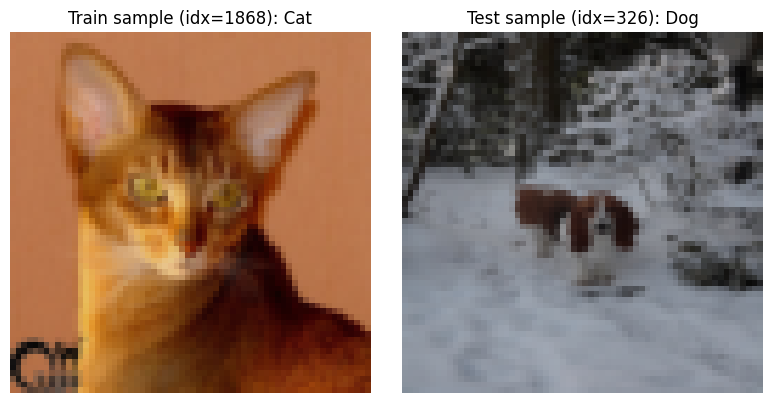

In [20]:
# Random indices
train_idx = random.randint(0, len(train_dataset) - 1)
test_idx = random.randint(0, len(test_dataset) - 1)

# Get samples
train_img, train_label = train_dataset[train_idx]
test_img, test_label = test_dataset[test_idx]

# Convert from (C, H, W) → (H, W, C) for matplotlib
train_img = train_img.permute(1, 2, 0)
test_img = test_img.permute(1, 2, 0)

label_map = {0: "Cat", 1: "Dog"}

# Plot
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

axes[0].imshow(train_img)
axes[0].set_title(f"Train sample (idx={train_idx}): {label_map[train_label]}")
axes[0].axis("off")

axes[1].imshow(test_img)
axes[1].set_title(f"Test sample (idx={test_idx}): {label_map[test_label]}")
axes[1].axis("off")

plt.tight_layout()
plt.show()

## 🚚 DataLoader

A ´Dataset´ in PyTorch represents the data itself. Its role is to define how individual samples are stored and accessed. It knows how many examples exist and how to return one sample at a time (for example, one image and its label). A Dataset does not handle batching, shuffling, or performance optimizations—it simply answers the question: “What is sample i?”

A ´DataLoader´ is needed to efficiently feed data to the model during training. It wraps a Dataset and automatically creates mini-batches, shuffles the data each epoch, and loads samples in parallel to avoid I/O bottlenecks. Without a DataLoader, training would be slower, more error-prone, and require manual batching logic. In practice, models are almost always trained using a DataLoader rather than accessing the Dataset directly.

In [4]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)

## Feed-Forward Network

In [5]:
class FeedForwardNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(64 * 64 * 3, 512),
            nn.ReLU(),
            nn.Linear(512, 128),
            nn.ReLU(),
            nn.Linear(128, 1)   # binary output
        )

    def forward(self, x):
        x = x.view(x.size(0), -1)  # flatten
        return self.net(x)

## Training Setup


Here we set up the training configuration, including the device where tensors and operations will be executed, and we define the model, loss function, and optimizer.

For the optimizer, PyTorch provides several options in the [```optim ```](https://docs.pytorch.org/docs/stable/optim.html) module, allowing you to choose different optimization strategies depending on the problem and training behavior you want.



In [6]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model = FeedForwardNet().to(device)

criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

## Training Loop

The following training loop shows how the model learns by repeatedly processing the training data, computing errors, and updating its parameters over multiple epochs.

**Epoch**: One epoch means one full pass over the entire training dataset. Here, the model sees all training samples 5 times.

### Train steps

* `model.train()`: Puts the model in training mode (important for layers like dropout or batch normalization).

* Iterate over `train_loader`: Loads the training data in mini-batches.

* `images.to(device), labels.to(device)`: Moves data to the same device (CPU or GPU) as the model.

* `optimizer.zero_grad()`: Clears old gradients from the previous update step.

* `outputs = model(images)`: Performs a forward pass to get predictions.

* `loss = criterion(outputs, labels)`: Computes how wrong the predictions are.

* `loss.backward()`: Computes gradients via backpropagation.

* `optimizer.step()`: Updates the model parameters using those gradients.

* `total_loss += loss.item()`: Accumulates loss to monitor training progress.

In [7]:
for epoch in range(5):
    model.train()
    total_loss = 0

    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.float().unsqueeze(1).to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {epoch+1} | Loss: {total_loss / len(train_loader):.4f}")

Epoch 1 | Loss: 0.6666
Epoch 2 | Loss: 0.6337
Epoch 3 | Loss: 0.6321
Epoch 4 | Loss: 0.6336
Epoch 5 | Loss: 0.6228


## Evaluation


After training, it is important to evaluate the model to understand how well it generalizes to unseen data and to ensure it has not simply memorized the training set. For this task, we use **classification accuracy** as the evaluation metric, which measures the proportion of correctly predicted cat and dog images and provides an intuitive and easy-to-interpret indicator of model performance for binary classification.

In [21]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        preds = (torch.sigmoid(outputs) > 0.5).squeeze()

        correct += (preds == labels).sum().item()
        total += labels.size(0)

print(f"Test accuracy: {correct / total:.3f}")

Test accuracy: 0.677


# References
* Pytorch documentation: https://pytorch.org/docs/stable/index.html
* A tutorial on how autograd works: https://towardsdatascience.com/pytorch-autograd-understanding-the-heart-of-pytorchs-magic-2686cd94ec95